In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

%matplotlib inline


In [2]:
data_dir = "./data/"


In [3]:
df = pd.read_csv(os.path.join(data_dir, "evals.csv"))

In [4]:
df.head()

,eval_id,learner_id,audience,group,level,role,organization,pronouns,sexuality,ethnicity,...,digital_content,digital_smooth,digital_professional,digital_accessible,personnel_present,personnel_pleasant,personnel_helpful,personnel_professional,personnel_inclusive,personnel_knowledgeable
0,70000,0,Employee,FI,4,HumanResources,ESDC,SheHer,Heterosexual,Caucasian,...,True,False,True,False,False,False,False,False,False,False
1,70000,0,Employee,FI,4,HumanResources,ESDC,SheHer,Heterosexual,Caucasian,...,True,False,False,False,True,True,False,True,False,False
2,70001,1,Employee,PM,4,Administrative,DFO,HeHim,Heterosexual,Caucasian,...,True,False,False,True,False,False,False,False,False,False
3,70001,1,Employee,PM,4,Administrative,DFO,HeHim,Heterosexual,Caucasian,...,True,False,True,False,True,True,False,False,False,True
4,70002,2,Employee,IS,2,Operations,PSPC,SheHer,NoAnswer,Caucasian,...,True,False,False,False,False,False,False,False,False,False


In [5]:
df.describe()

,eval_id,learner_id,level,registration_id,offering_id,module,current_skill,desired_skill,final_skill,rating,percent_completed
count,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.00000,15432.000000
mean,80618.420684,10618.420684,3.409668,99624.641524,960.199067,181.865474,2.613077,4.765228,2.803331,5.32640,0.785737
std,7906.514896,7906.514896,1.801325,73716.390247,94.998638,96.418462,1.843861,1.905458,1.884799,2.19851,0.187917
min,70000.000000,0.000000,1.000000,0.000000,877.000000,101.000000,0.000000,2.000000,0.000000,1.00000,0.000000
25%,73428.750000,3428.750000,2.000000,30428.750000,880.000000,101.000000,1.000000,3.000000,1.000000,4.00000,0.700000
50%,77357.500000,7357.500000,3.000000,70357.500000,884.000000,102.000000,2.000000,5.000000,3.000000,5.00000,0.800000
75%,89570.250000,19570.250000,5.000000,182141.250000,1077.000000,301.000000,4.000000,6.000000,4.000000,7.00000,1.000000
max,91999.000000,21999.000000,7.000000,192999.000000,1078.000000,301.000000,10.000000,12.000000,10.000000,10.00000,1.000000


In [6]:
audience = df.audience
role = df.role

In [7]:
scan = df.drop(['eval_id', 'learner_id', 'registration_id', 'offering_id'], axis=1)

In [8]:
scan.groupby(['audience', 'role', 'ethnicity']).agg('mean')

level  person_with_disability  \
audience   role           ethnicity                                          
Employee   Administrative Asian           2.880952                0.142857   
                          Black           3.745098                0.019608   
                          Caucasian       2.918079                0.118644   
                          HispanicLatinx  3.080000                0.160000   
                          Indigenous      2.714286                0.053571   
...                                            ...                     ...   
Specialist Security       Black           3.000000                0.000000   
                          Caucasian       3.237500                0.087500   
                          HispanicLatinx  3.400000                0.200000   
                          Indigenous      3.400000                0.000000   
                          NoAnswer        3.200000                0.400000   

                                              module  current_skill  \
audience   role           ethnicity                                   
Employee   Administrative Asian           210.761905       2.404762   
                          Black           156.274510       2.666667   
                          Caucasian       182.377119       2.734463   
                          HispanicLatinx  189.280000       2.560000   
                          Indigenous      179.892857       2.589286   
...                                              ...            ...   
Specialist Security       Black           168.000000       1.333333   
                          Caucasian       196.275000       2.850000   
                          HispanicLatinx  221.200000       1.800000   
                          Indigenous      221.200000       2.000000   
                          NoAnswer        221.200000       3.800000   

                                          desired_skill  final_skill  \
audience   role           ethnicity                                    
Employee   Administrative Asian                4.571429     2.547619   
                          Black                4.862745     2.882353   
                          Caucasian            4.854520     2.929379   
                          HispanicLatinx       4.720000     2.740000   
                          Indigenous           4.642857     2.803571   
...                                                 ...          ...   
Specialist Security       Black                3.333333     1.666667   
                          Caucasian            4.900000     3.075000   
                          HispanicLatinx       3.800000     2.000000   
                          Indigenous           4.400000     2.200000   
                          NoAnswer             5.800000     4.000000   

                                          recommend    rating     clear  \
audience   role           ethnicity                                       
Employee   Administrative Asian            0.476190  5.333333  0.571429   
                          Black            0.509804  5.392157  0.392157   
                          Caucasian        0.440678  5.266949  0.463277   
                          HispanicLatinx   0.580000  6.040000  0.480000   
                          Indigenous       0.357143  5.017857  0.482143   
...                                             ...       ...       ...   
Specialist Security       Black            0.666667  5.333333  0.666667   
                          Caucasian        0.512500  5.475000  0.475000   
                          HispanicLatinx   0.400000  5.200000  0.800000   
                          Indigenous       0.400000  5.200000  0.800000   
                          NoAnswer         0.400000  5.400000  0.600000   

                                          entertaining  ...  digital_content  \
audience   role           ethnicity                     ...                    
Employee   Administrative Asian  

In [9]:
scan.groupby('module').agg('mean')

,level,person_with_disability,current_skill,desired_skill,final_skill,recommend,rating,clear,entertaining,relevant,...,digital_content,digital_smooth,digital_professional,digital_accessible,personnel_present,personnel_pleasant,personnel_helpful,personnel_professional,personnel_inclusive,personnel_knowledgeable
module,,,,,,,,,,,,,,,,,,,,,
101,3.439333,0.097333,2.634444,4.781333,2.644667,0.353111,4.723111,0.470667,0.528444,0.400222,...,1.0,0.168889,0.280000,0.214222,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
102,3.439333,0.097333,2.634444,4.781333,3.180667,0.451556,5.249333,0.287333,0.450667,0.454889,...,1.0,0.270667,0.302667,0.323556,1.0,0.598889,0.466222,0.548667,0.394444,0.406000
201,3.101852,0.143519,2.842593,4.958333,2.861111,0.222222,3.819444,0.273148,0.148148,0.388889,...,0.0,0.000000,0.000000,0.000000,1.0,0.180556,0.226852,0.138889,0.143519,0.375000
202,3.101852,0.143519,2.842593,4.958333,3.310185,0.550926,5.856481,0.504630,0.500000,0.333333,...,0.0,0.000000,0.000000,0.000000,1.0,0.185185,0.148148,0.152778,0.120370,0.337963
301,3.387333,0.095833,2.564500,4.727167,2.619000,0.568500,5.871833,0.596333,0.594333,0.591333,...,1.0,0.483333,0.566333,0.283333,1.0,0.595000,0.596500,0.470500,0.503333,0.495167


In [10]:
feedback = scan.drop(["level", "current_skill", "desired_skill", "final_skill", "rating"], axis=1)

skill = scan[["module", "current_skill", "desired_skill", "final_skill"]]
learning_obj = scan[["module", "lo_1", "lo_2"]]

core = feedback[["module", "recommend", "clear", "entertaining", "relevant", "informative", "useful", "inclusive"]]
digital = feedback[["module", "digital_smooth", "digital_professional", "digital_accessible"]]
physical = feedback[["module", "physical_clean", "physical_pleasant", "physical_accessible", "physical_professional", "physical_comfortable"]]
personnel = feedback[["module", "personnel_pleasant", "personnel_helpful", "personnel_professional", "personnel_inclusive", "personnel_knowledgeable"]]


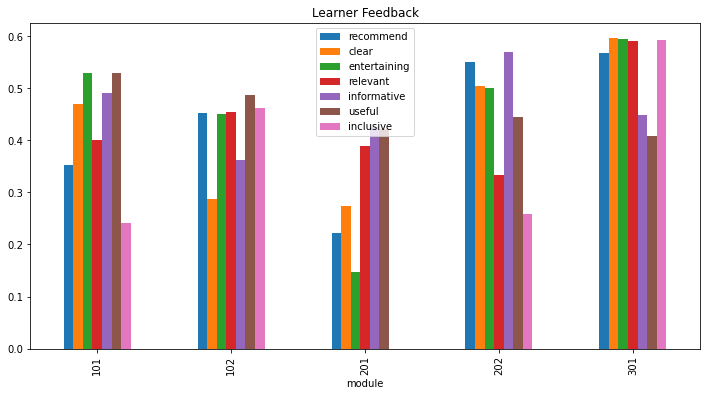

In [11]:
core.groupby("module").agg('mean').plot(title="Learner Feedback", kind="bar", figsize=(12,6))

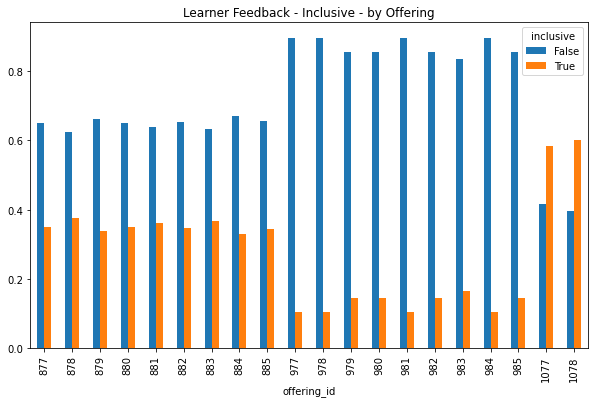

In [43]:
pd.crosstab(df.offering_id, df.inclusive, normalize="index").plot(title="Learner Feedback - Inclusive - by Offering", kind="bar", figsize=(10,6))

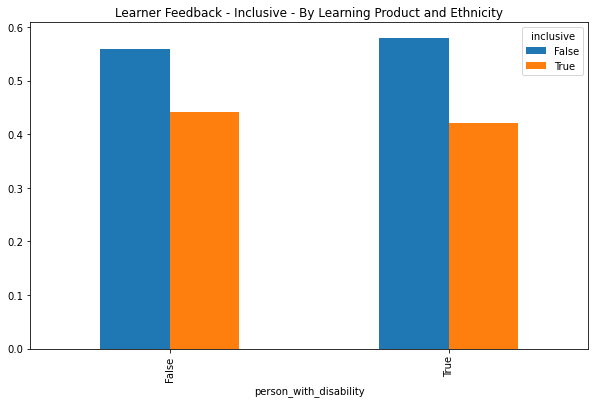

In [53]:
pd.crosstab(df.person_with_disability, df.inclusive, normalize="index").plot(title="Learner Feedback - Inclusive - By Learning Product and Ethnicity", kind="bar", figsize=(10,6))

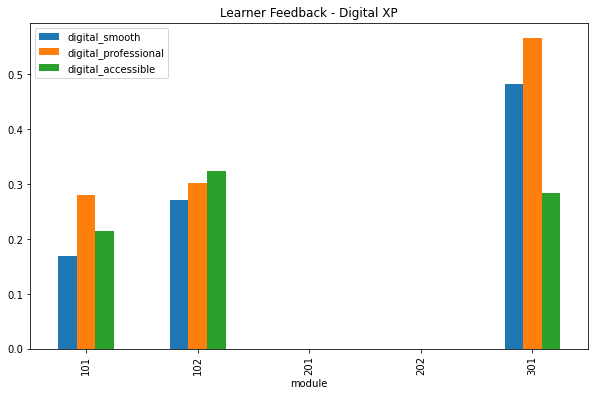

In [13]:
digital.groupby("module").agg('mean').plot(title="Learner Feedback - Digital XP", kind="bar", figsize=(10,6))

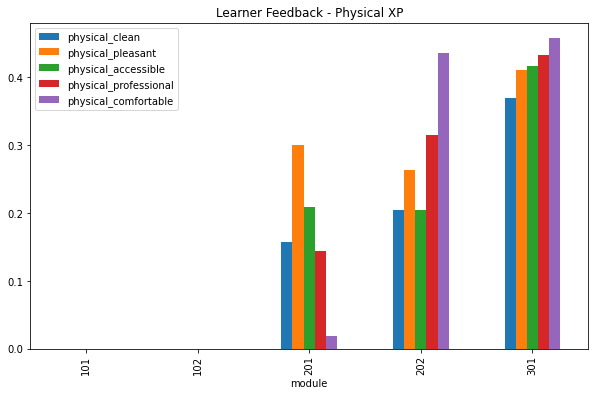

In [14]:
physical.groupby("module").agg('mean').plot(title="Learner Feedback - Physical XP", kind="bar", figsize=(10,6))

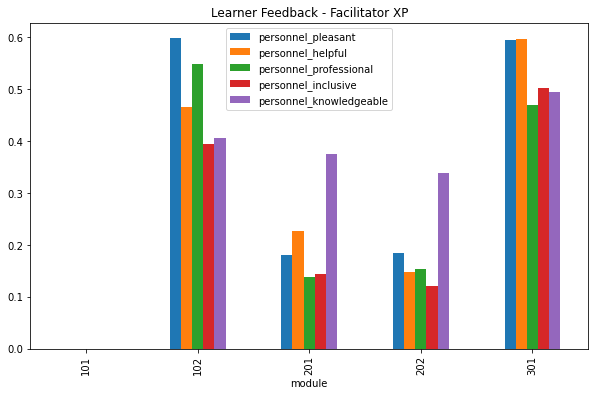

In [15]:
personnel.groupby("module").agg('mean').plot(title="Learner Feedback - Facilitator XP", kind="bar", figsize=(10,6))

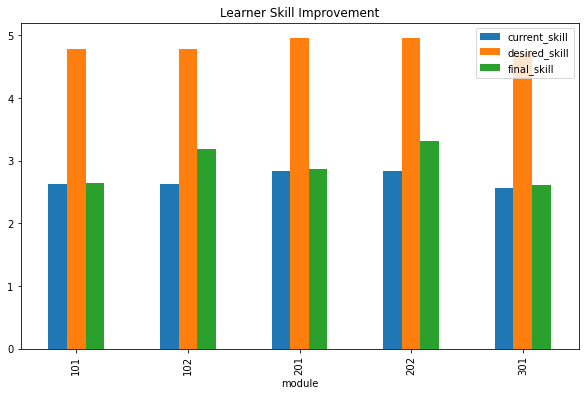

In [16]:
skill.groupby("module").agg('mean').plot(title="Learner Skill Improvement", kind="bar", figsize=(10,6))

In [17]:
learning_obj.lo_1.unique()

array(['Meet', 'NotMeet', 'Exceeded'], dtype=object)

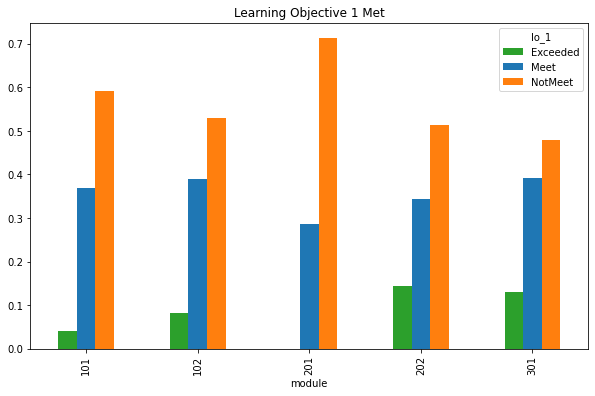

In [18]:
pd.crosstab(learning_obj.module, learning_obj.lo_1, normalize='index').plot(kind='bar', color=['C2', 'C0', 'C1'], title="Learning Objective 1 Met", figsize=(10,6))

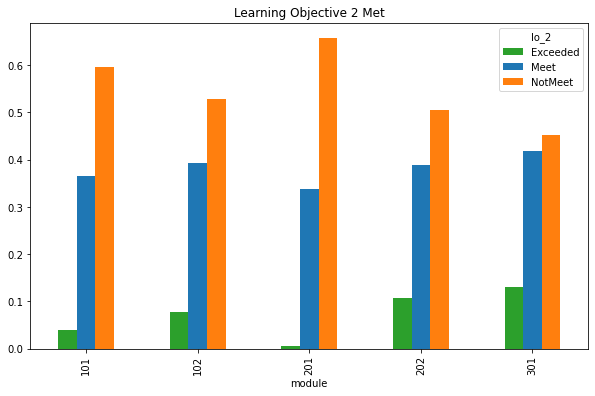

In [19]:
pd.crosstab(learning_obj.module, learning_obj.lo_2, normalize='index').plot(kind='bar', color=['C2', 'C0', 'C1'], title="Learning Objective 2 Met", figsize=(10,6))

In [20]:
learning_obj.columns

Index(['module', 'lo_1', 'lo_2'], dtype='object')

In [21]:
eleven_grad=["darkred", "brown", "darkorange", "orange", "gold", "dodgerblue", "royalblue", "blue", "green", "forestgreen", "limegreen"]

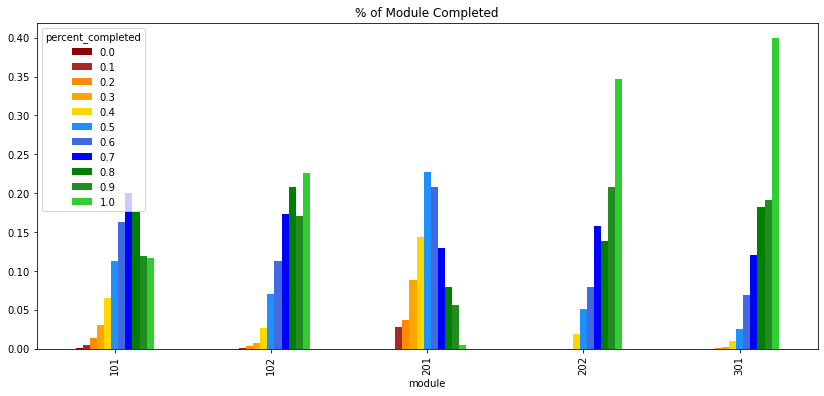

In [22]:
pd.crosstab(scan.module, scan.percent_completed, normalize='index').plot(kind='bar', title="% of Module Completed", figsize=(14,6), color=eleven_grad)

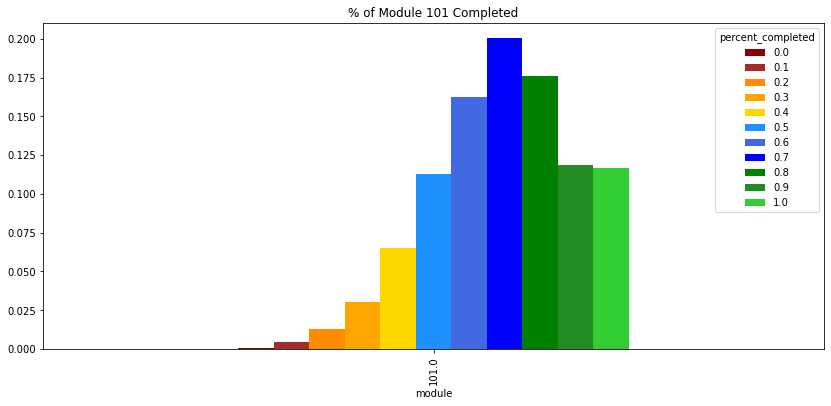

In [23]:
pd.crosstab(scan.module.where(scan.module==101), scan.percent_completed, normalize='index').plot(kind='bar', title="% of Module 101 Completed", figsize=(14,6), color=eleven_grad)

In [24]:
pd.crosstab([df.offering_id, df.learning_product.where(df.learning_product=="I501")], df.rating)

,rating,1,2,3,4,5,6,7,8,9,10
offering_id,learning_product,,,,,,,,,,
877,I501,53,86,116,160,173,161,132,65,38,16
878,I501,52,81,122,154,188,170,111,68,31,23
879,I501,62,72,124,166,188,150,120,62,38,18
880,I501,59,68,126,163,175,169,121,62,40,17
881,I501,51,83,126,171,188,139,116,77,30,19
882,I501,62,64,116,140,214,164,124,69,32,15
883,I501,62,51,135,141,175,177,133,74,28,24
884,I501,57,68,136,159,194,145,116,70,31,24
885,I501,58,79,103,164,194,169,119,69,31,14


In [25]:
eight_grad=["darkred", "brown", "orange", "gold", "dodgerblue", "royalblue", "green", "forestgreen"]

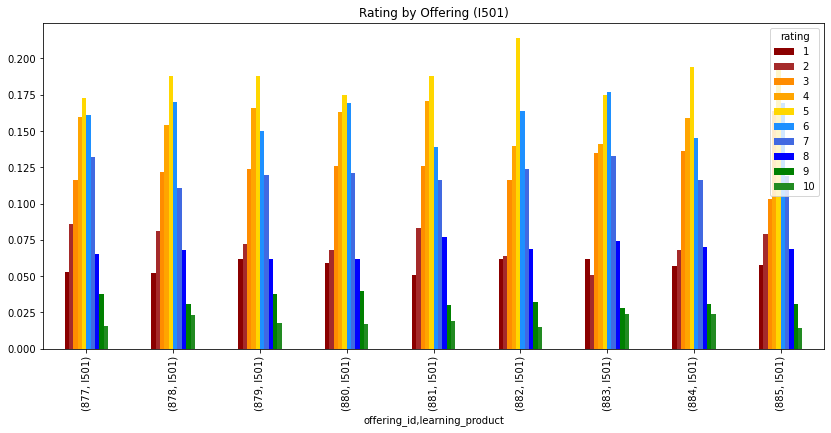

In [26]:
pd.crosstab([df.offering_id, df.learning_product.where(df.learning_product=="I501")], df.rating, normalize='index').plot(kind='bar', title="Rating by Offering (I501)", figsize=(14,6),
                                                                                                                        color=eleven_grad)

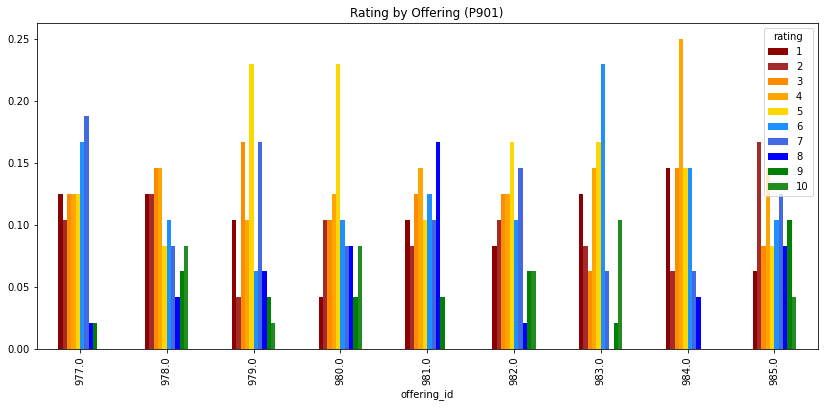

In [27]:
pd.crosstab(df.offering_id.where(df.learning_product=="P901"), df.rating, normalize="index").plot(kind='bar', title="Rating by Offering (P901)", figsize=(14,6), color=eleven_grad)

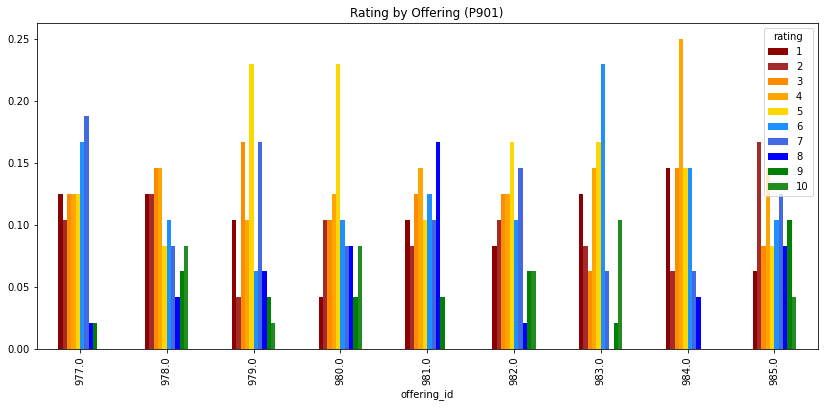

In [28]:
df.groupby(df["offering_id"].where(df.learning_product=="P901"))["rating"].value_counts(normalize=True).unstack().plot(kind='bar', title="Rating by Offering (P901)", figsize=(14,6),
                                                                                                                      color=eleven_grad)

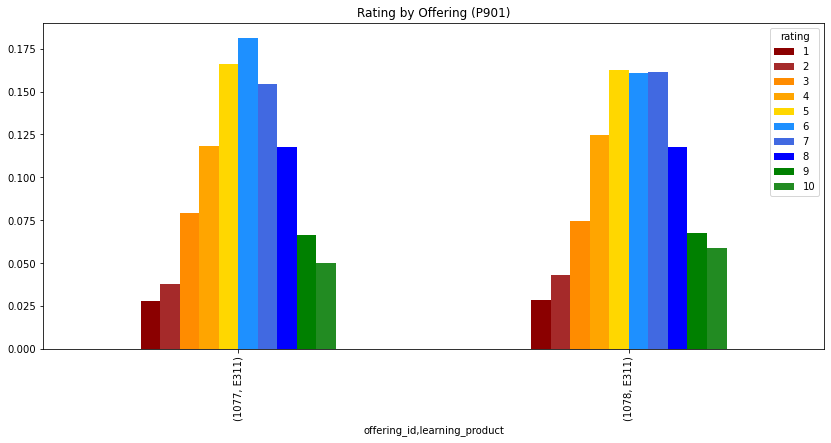

In [29]:
pd.crosstab([df.offering_id, df.learning_product.where(df.learning_product=="E311")], df.rating, normalize="index").plot(kind='bar', title="Rating by Offering (P901)", figsize=(14,6),
                                                                                                                      color=eleven_grad)

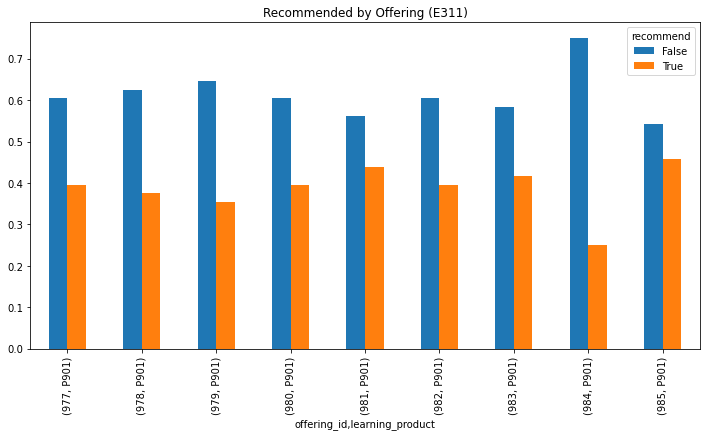

In [30]:
pd.crosstab([df.offering_id, df.learning_product.where(df.learning_product=="P901")], df.recommend, normalize="index").plot(kind='bar', title="Recommended by Offering (E311)", figsize=(12,6))

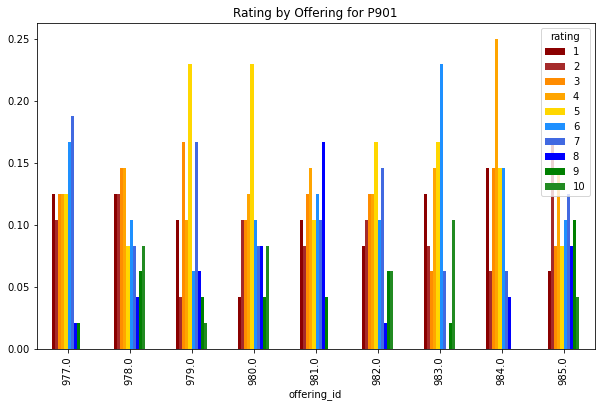

In [31]:
pd.crosstab(df.offering_id.where(df.learning_product=="P901"), df.rating, normalize="index").plot(kind='bar', title="Rating by Offering for P901", figsize=(10,6), color=eleven_grad)

In [32]:
rating_offering = df[["learning_product", "rating"]]

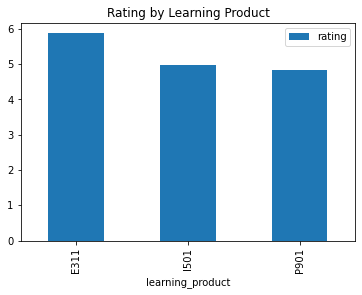

In [33]:
rating_offering.groupby("learning_product").agg("mean").plot(kind="bar", title="Rating by Learning Product")

In [34]:
rating_offering.groupby("learning_product").agg("mean")

,rating
learning_product,
E311,5.871833
I501,4.986222
P901,4.837963


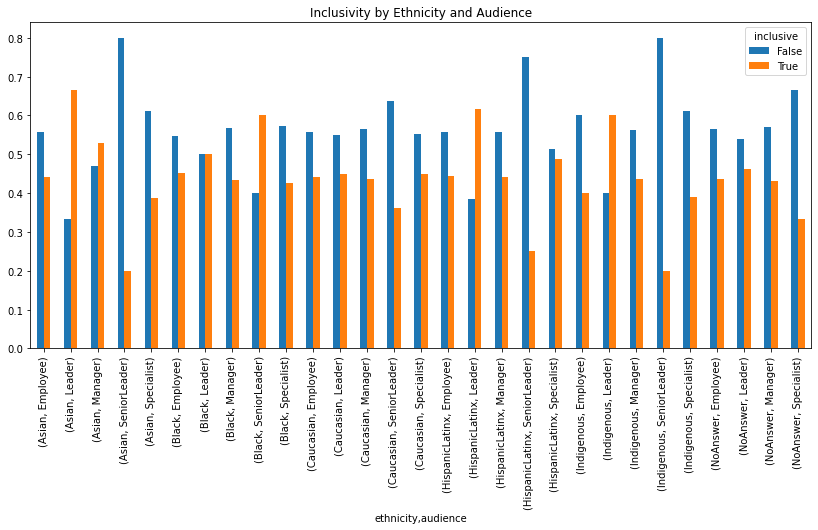

In [35]:
pd.crosstab([df.ethnicity, df.audience], df.inclusive, normalize="index").plot(kind='bar', title="Inclusivity by Ethnicity and Audience", figsize=(14,6))

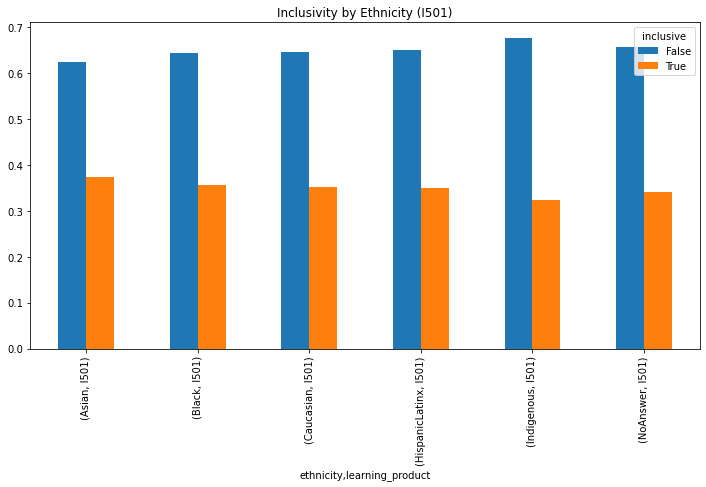

In [36]:
pd.crosstab([df.ethnicity, df.learning_product.where(df.learning_product=="I501")], df.inclusive==True, normalize="index").plot(kind='bar', title="Inclusivity by Ethnicity (I501)", figsize=(12,6))

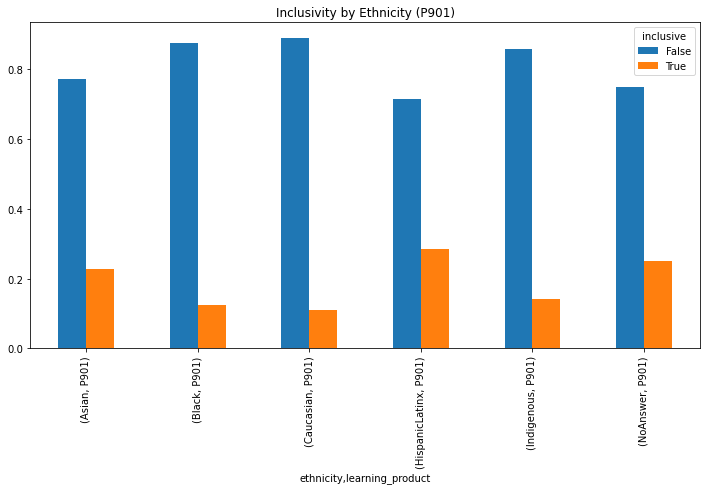

In [37]:
pd.crosstab([df.ethnicity, df.learning_product.where(df.learning_product=="P901")], df.inclusive==True, normalize="index").plot(kind='bar', title="Inclusivity by Ethnicity (P901)", figsize=(12,6))

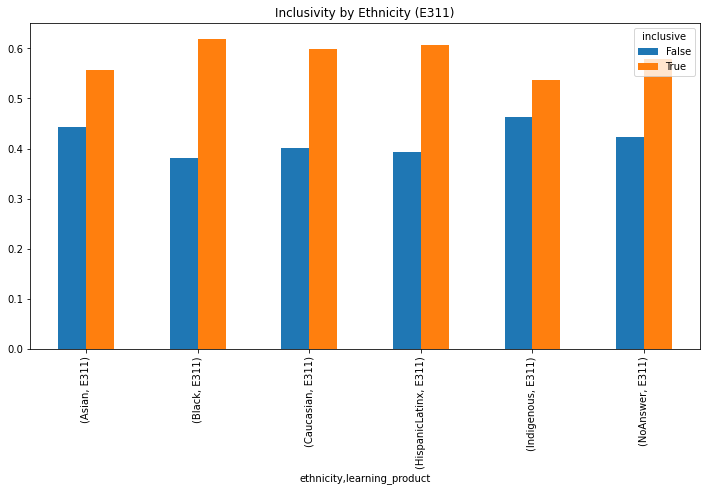

In [38]:
pd.crosstab([df.ethnicity, df.learning_product.where(df.learning_product=="E311")], df.inclusive==True, normalize="index").plot(kind='bar', title="Inclusivity by Ethnicity (E311)", figsize=(12,6))

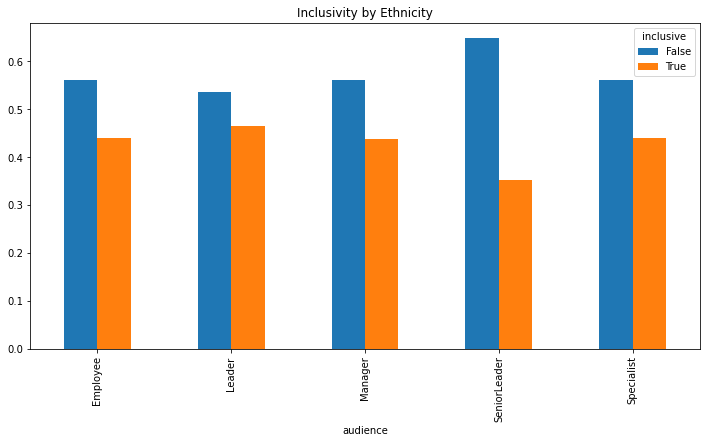

In [39]:
pd.crosstab(df.audience, df.inclusive==True, normalize="index").plot(kind='bar', title="Inclusivity by Ethnicity", figsize=(12,6))